In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [708]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [808]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt
from IPython.display import display


from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor  
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedShuffleSplit, GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer,PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,QuantileTransformer,PowerTransformer
from sklearn.datasets import make_classification
from sklearn.metrics import precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay,log_loss
from sklearn.metrics import f1_score,accuracy_score
import category_encoders as ce

from sklearn.linear_model import ElasticNet, Ridge, Lasso, Lars,SGDRegressor,LogisticRegression
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,VotingClassifier

from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer , make_column_transformer, TransformedTargetRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn import svm
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import FixedThresholdClassifier
from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.calibration import CalibratedClassifierCV
from sklearn.feature_selection import SequentialFeatureSelector

### Область работы 2 (поиск  модели .... )

In [847]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
path_train_y = 'train_Y.csv'

In [849]:
X = pd.read_csv(path_train)
y = pd.read_csv(path_train_y)

In [851]:
display(X.head())
display(X.describe())
display(X.info())

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,1.0,23.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,4.0,5.0,2.0,0.0,0.0,6.0,6.0,3.0
1,1.0,1.0,1.0,35.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,15.0,15.0,0.0,0.0,10.0,4.0,5.0
2,1.0,0.0,1.0,30.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,3.0,30.0,30.0,0.0,0.0,4.0,5.0,1.0
3,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,6.0,7.0
4,0.0,0.0,1.0,36.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,2.0,0.0,0.0,5.0,4.0,5.0


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,...,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000,47363.000000
mean,0.563879,0.523468,0.975741,29.862551,0.475118,0.062834,0.148766,0.701940,0.610814,0.788844,...,0.954585,0.094145,2.835272,3.732829,5.788105,0.252349,0.457213,8.587294,4.923485,5.703292
std,0.495908,0.499454,0.153855,7.144498,0.499386,0.242666,0.355861,0.457411,0.487571,0.408133,...,0.208215,0.292034,1.112528,8.145554,10.044184,0.434365,0.498171,2.847747,1.027849,2.174629
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,5.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47363 entries, 0 to 47362
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   HighBP                47363 non-null  float64
 1   HighChol              47363 non-null  float64
 2   CholCheck             47363 non-null  float64
 3   BMI                   47363 non-null  float64
 4   Smoker                47363 non-null  float64
 5   Stroke                47363 non-null  float64
 6   HeartDiseaseorAttack  47363 non-null  float64
 7   PhysActivity          47363 non-null  float64
 8   Fruits                47363 non-null  float64
 9   Veggies               47363 non-null  float64
 10  HvyAlcoholConsump     47363 non-null  float64
 11  AnyHealthcare         47363 non-null  float64
 12  NoDocbcCost           47363 non-null  float64
 13  GenHlth               47363 non-null  float64
 14  MentHlth              47363 non-null  float64
 15  PhysHlth           

None

In [855]:
X.drop_duplicates(inplace=True)

In [857]:
y = y.loc[X.index]

In [859]:
missing_values = X.isnull().sum()
print("Количество пропущенных значений по признакам:")
print(missing_values)

Количество пропущенных значений по признакам:
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


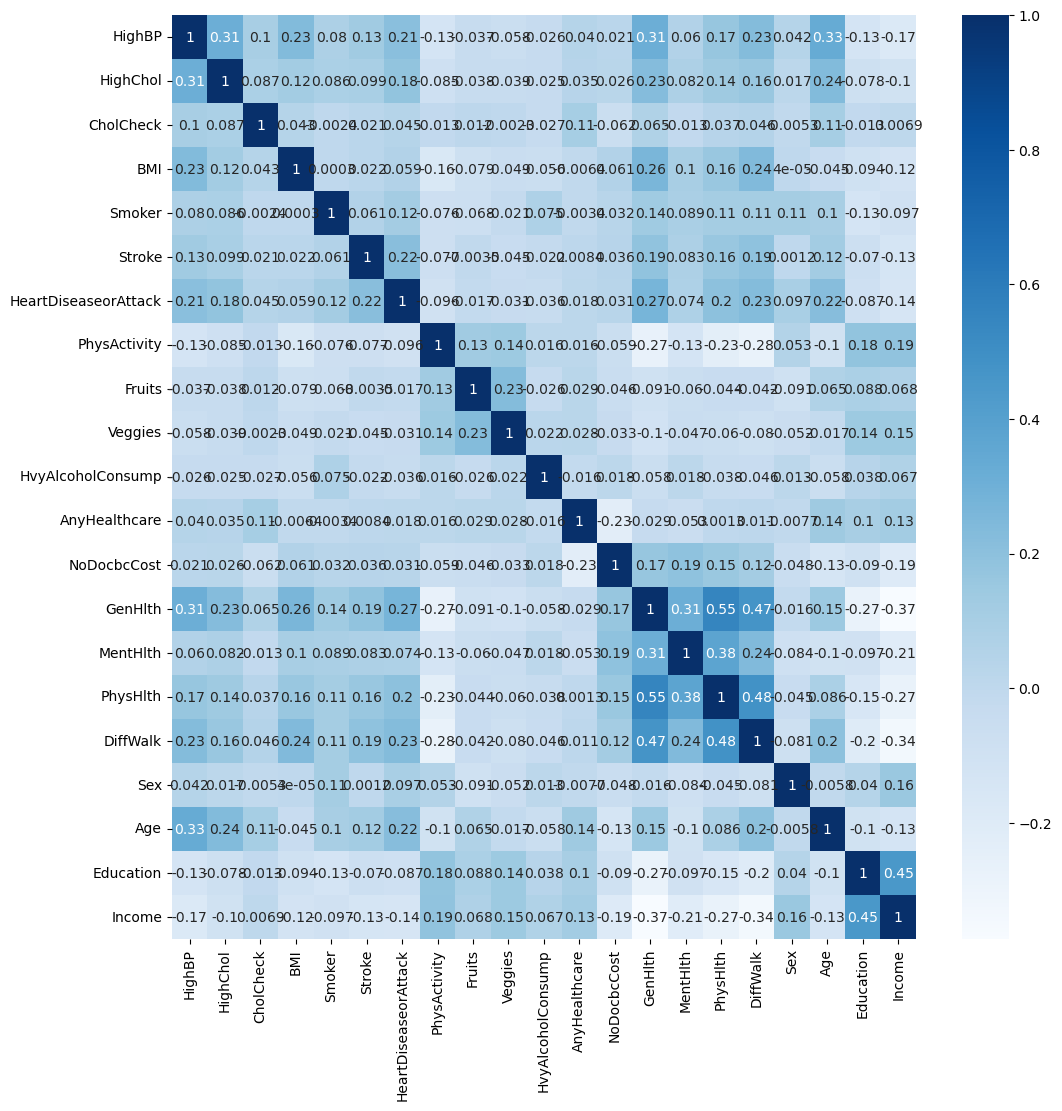

In [861]:
plt.figure(figsize=(12,12))
sns.heatmap(X.corr(),annot=True,cmap='Blues')
plt.show()

In [863]:
y = y['Diabetes_binary']

In [865]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

## Начнем строить модели
### Random Forest
##### Построим график, чтобы посмотреть, с какого значения количество деревьев перестает влиять на результат

(0.65, 1.01)

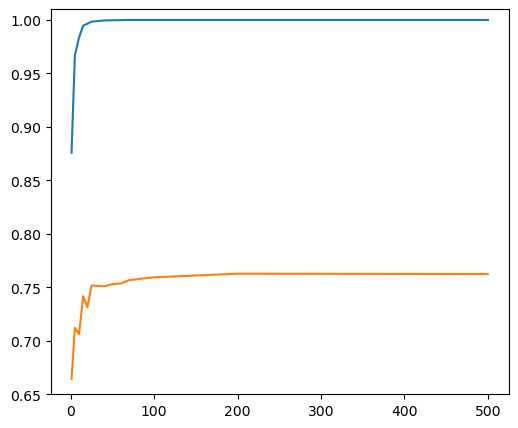

In [868]:
sc_train1 =[]
sc_test1 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500]
beta = sqrt(2)
for n in n_estimators:
    rf = RandomForestClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    sc_train_n = fbeta_score(y_train, y_pred_train, beta=beta)
    sc_test_n = fbeta_score(y_test, y_pred_test, beta=beta)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(121)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.65, 1.01)

##### Судя по графику достаточным количеством будет 200 деревьев 
##### Построим случайные леса с разными параметрами 

In [871]:
rf_1= RandomForestClassifier(n_estimators=200, max_features=None, random_state=42, n_jobs=-1)
rf_1.fit(X_train, y_train)
y_pred_train = rf_1.predict(X_train)
y_pred_test = rf_1.predict(X_test)
beta = sqrt(2)
print('Скор на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Скор на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Скор на обучающем наборе: 1.000
Скор на тестовом наборе: 0.749


##### Явное переобучение

In [874]:
rf_2= RandomForestClassifier(n_estimators=200, max_depth = 7, max_features=None, random_state=42, n_jobs=-1)
rf_2.fit(X_train, y_train)
y_pred_train = rf_2.predict(X_train)
y_pred_test = rf_2.predict(X_test)
beta = sqrt(2)
print('Скор на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Скор на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Скор на обучающем наборе: 0.786
Скор на тестовом наборе: 0.774


In [876]:
rf_3= RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1)
rf_3.fit(X_train, y_train)
y_pred_train = rf_3.predict(X_train)
y_pred_test = rf_3.predict(X_test)
beta = sqrt(2)
print('Скор на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Скор на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Скор на обучающем наборе: 0.803
Скор на тестовом наборе: 0.774


##### Поменяем порог принятия решений 
##### Построим Precision-Recall кривую для поиска оптимального значения threshold

Оптимальный порог: 0.32030701410104256
Precision: 0.6616184794248126, Recall: 0.9221748400852878


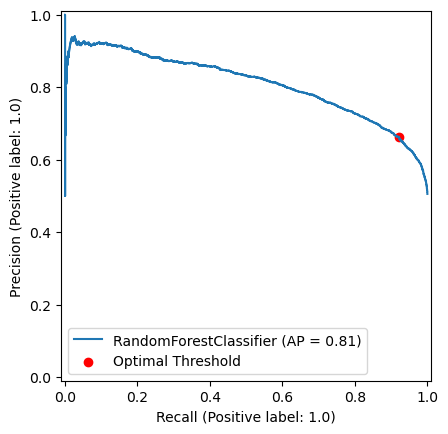

In [959]:
y_scores = rf_3.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

C_FN = 2  # Стоимость пропуска диабета
C_FP = 1  # Стоимость ложного диагноза
weighted_cost = C_FN * (1 - recall) + C_FP * ((1 - precision) / precision)

optimal_idx = np.argmin(weighted_cost)
optimal_threshold = thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}, Recall: {recall[optimal_idx]}")

display = PrecisionRecallDisplay.from_estimator(rf_3, X_test, y_test)
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold')
plt.legend()
plt.show()

In [961]:
ftc_rf = FixedThresholdClassifier(rf_3, threshold=0.32030701410104256, response_method="predict_proba")
ftc_rf.fit(X_train, y_train)

y_pred = ftc_rf.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.8151661745303763


### Extra Trees
##### Построим график, чтобы посмотреть, с какого значения количество деревьев перестает влиять на результат

(0.65, 1.01)

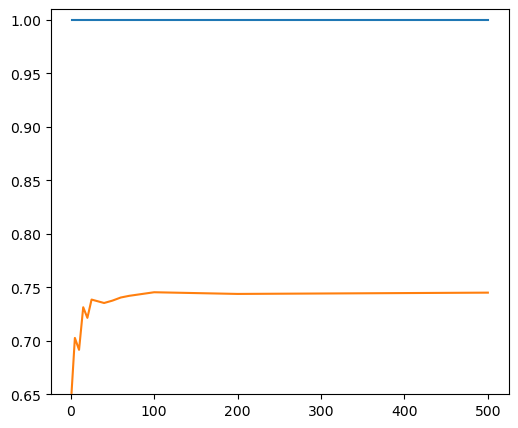

In [884]:
sc_train1 =[]
sc_test1 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500]
beta = sqrt(2)
for n in n_estimators:
    et = ExtraTreesClassifier(n_estimators= n, random_state=0, n_jobs = -1)
    et.fit(X_train, y_train)
    y_pred_train = et.predict(X_train)
    y_pred_test = et.predict(X_test)
    sc_train_n = fbeta_score(y_train, y_pred_train, beta=beta)
    sc_test_n = fbeta_score(y_test, y_pred_test, beta=beta)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(121)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.65, 1.01)

##### Судя по графику достаточным количеством будет 200 деревьев 
##### Построим модели с разными параметрами 

In [887]:
et_1= ExtraTreesClassifier(n_estimators=200, max_features=None, random_state=42, n_jobs=-1)
et_1.fit(X_train, y_train)
y_pred_train = et_1.predict(X_train)
y_pred_test = et_1.predict(X_test)
beta = sqrt(2)
print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Правильность на обучающем наборе: 1.000
Правильность на тестовом наборе: 0.736


##### Явное переобучение

In [890]:
et_2= ExtraTreesClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1)
et_2.fit(X_train, y_train)
y_pred_train = et_2.predict(X_train)
y_pred_test = et_2.predict(X_test)
beta = sqrt(2)
print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Правильность на обучающем наборе: 0.796
Правильность на тестовом наборе: 0.771


##### Поменяем порог принятия решений 
##### Построим Precision-Recall кривую для поиска оптимального значения threshold

Оптимальный порог: 0.33515253522002963
Precision: 0.6610455311973018, Recall: 0.9194029850746268


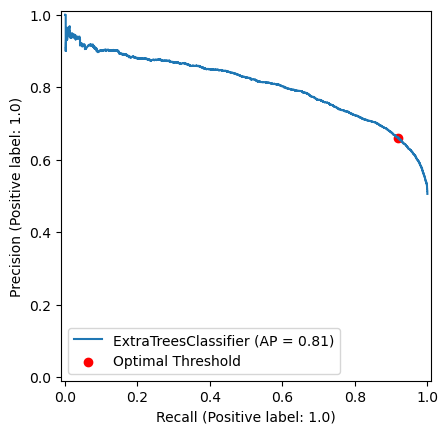

In [893]:
y_scores = et_2.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

C_FN = 2  # Стоимость пропуска диабета
C_FP = 1  # Стоимость ложного диагноза
weighted_cost = C_FN * (1 - recall) + C_FP * ((1 - precision) / precision)

optimal_idx = np.argmin(weighted_cost)
optimal_threshold = thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}, Recall: {recall[optimal_idx]}")

display = PrecisionRecallDisplay.from_estimator(et_2, X_test, y_test)
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold')
plt.legend()
plt.show()

In [895]:
ftc_et = FixedThresholdClassifier(et_2, threshold=0.335152535220029756, response_method="predict_proba")
ftc_et.fit(X_train, y_train)

y_pred = ftc_et.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.8132939252924161


### Gradient Boosting
##### Построим график, чтобы посмотреть, с какого значения количество деревьев перестает влиять на результат

(0.65, 1.01)

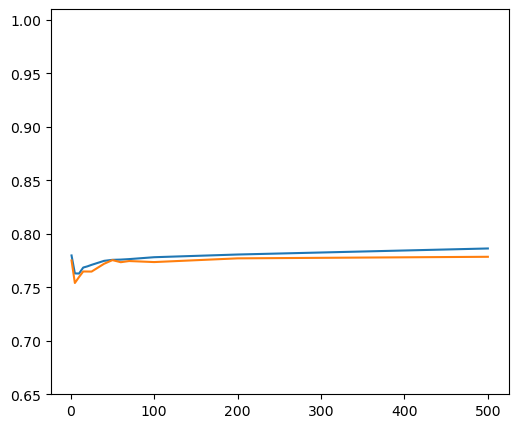

In [898]:
sc_train1 =[]
sc_test1 = []
n_estimators = [1, 5, 10, 15, 20, 25, 40, 50, 60, 70, 100, 200, 500]
beta = sqrt(2)
for n in n_estimators:
    gb = GradientBoostingClassifier(n_estimators= n, random_state=0)
    gb.fit(X_train, y_train)
    y_pred_train = gb.predict(X_train)
    y_pred_test = gb.predict(X_test)
    sc_train_n = fbeta_score(y_train, y_pred_train, beta=beta)
    sc_test_n = fbeta_score(y_test, y_pred_test, beta=beta)
    sc_train1.append(sc_train_n)
    sc_test1.append(sc_test_n)

fig = plt.figure(figsize=(13,5))
ax1 = fig.add_subplot(121)
ax1.plot(n_estimators,sc_train1)
ax1.plot(n_estimators,sc_test1)
ax1.set_ylim(0.65, 1.01)

##### Судя по графику достаточным количеством будет 200 деревьев 
##### Построим модели с разными параметрами 

In [901]:
gb_1 = GradientBoostingClassifier(n_estimators=200, random_state=42)
gb_1.fit(X_train, y_train)
y_pred_train = gb_1.predict(X_train)
y_pred_test = gb_1.predict(X_test)
beta = sqrt(2)
print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Правильность на обучающем наборе: 0.781
Правильность на тестовом наборе: 0.777


In [905]:
gb_2 = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, n_estimators=200,random_state=42)
gb_2.fit(X_train, y_train)
y_pred_train = gb_2.predict(X_train)
y_pred_test = gb_2.predict(X_test)
beta = sqrt(2)
print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Правильность на обучающем наборе: 0.781
Правильность на тестовом наборе: 0.778


##### Поменяем порог принятия решений 
##### Построим Precision-Recall кривую для поиска оптимального значения threshold

Оптимальный порог: 0.31556538937073886
Precision: 0.6726534436982664, Recall: 0.9183368869936034


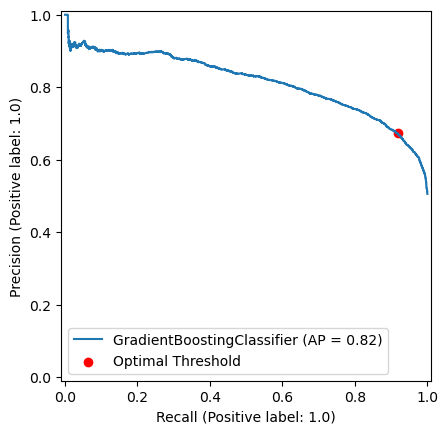

In [908]:
y_scores = gb_2.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

C_FN = 2  # Стоимость пропуска диабета
C_FP = 1  # Стоимость ложного диагноза
weighted_cost = C_FN * (1 - recall) + C_FP * ((1 - precision) / precision)

optimal_idx = np.argmin(weighted_cost)
optimal_threshold = thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}, Recall: {recall[optimal_idx]}")

display = PrecisionRecallDisplay.from_estimator(gb_2, X_test, y_test)
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold')
plt.legend()
plt.show()

In [910]:
ftc_gb = FixedThresholdClassifier(gb_2, threshold=0.31556538937073886, response_method="predict_proba")
ftc_gb.fit(X_train, y_train)

y_pred = ftc_gb.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.8186656529176963


### Hist Gradient Boosting

In [913]:
hgb_1 = HistGradientBoostingClassifier(random_state=42)
hgb_1.fit(X_train, y_train)
y_pred_train = hgb_1.predict(X_train)
y_pred_test = hgb_1.predict(X_test)
beta = sqrt(2)
print('Правильность на обучающем наборе: {:.3f}'.format(fbeta_score(y_train, y_pred_train, beta=beta)))
print('Правильность на тестовом наборе: {:.3f}'.format(fbeta_score(y_test, y_pred_test, beta=beta)))

Правильность на обучающем наборе: 0.791
Правильность на тестовом наборе: 0.778


##### Поменяем порог принятия решений 
##### Построим Precision-Recall кривую для поиска оптимального значения threshold

Оптимальный порог: 0.30320708080084324
Precision: 0.6655389820083039, Recall: 0.9228144989339019


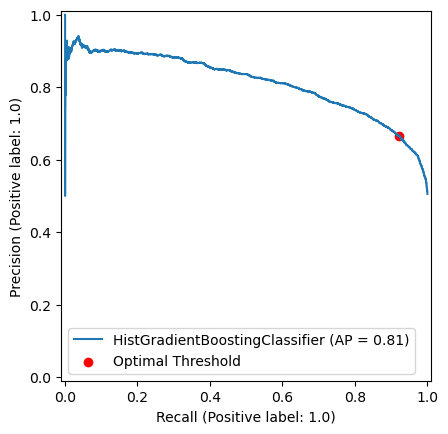

In [916]:
y_scores = hgb_1.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

C_FN = 2  # Стоимость пропуска диабета
C_FP = 1  # Стоимость ложного диагноза
weighted_cost = C_FN * (1 - recall) + C_FP * ((1 - precision) / precision)

optimal_idx = np.argmin(weighted_cost)
optimal_threshold = thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}, Recall: {recall[optimal_idx]}")

display = PrecisionRecallDisplay.from_estimator(hgb_1, X_test, y_test)
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold')
plt.legend()
plt.show()

In [922]:
ftc_hgb = FixedThresholdClassifier(hgb_1, threshold=0.30320708080084324, response_method="predict_proba")
ftc_hgb.fit(X_train, y_train)

y_pred = ftc_hgb.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.8174778064597369


### Логистическая Регрессия

In [925]:
pipe_LR = Pipeline([('preprocessing', MinMaxScaler()),
                 ('clf', LogisticRegression(max_iter = 7000))])

cv_LR = StratifiedShuffleSplit(test_size = 0.2, n_splits = 5, random_state = 42)
scaling_LR = [MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]
fbeta_scorer = make_scorer(fbeta_score, beta = sqrt(2))

param_grid_LR =[
    {'preprocessing': scaling_LR,'clf__penalty': ['l2'],
         'clf__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga']},
    {'preprocessing': scaling_LR,'clf__penalty': ['l1'],
         'clf__solver': ['liblinear','saga']},
    {'preprocessing': scaling_LR,'clf__penalty': [None],
         'clf__solver': ['newton-cg' ,'lbfgs','sag', 'saga']}
    ]

grid_LR = GridSearchCV(pipe_LR, param_grid_LR, scoring = fbeta_scorer, cv = cv_LR, n_jobs=-1)
grid_LR.fit(X_train, y_train)
y_pred = grid_LR.predict(X_test)
print("Наилучшие значения параметров: {}".format(grid_LR.best_params_))

Наилучшие значения параметров: {'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'preprocessing': RobustScaler()}


In [927]:
lr_1 = Pipeline([
    ('preprocessing', RobustScaler()),
    ('clf', LogisticRegression(penalty='l2', solver='lbfgs'))
])
lr_1.fit(X_train, y_train)
y_pred = lr_1.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.7641509433962265


##### Поменяем порог принятия решений 
##### Построим Precision-Recall кривую для поиска оптимального значения threshold

Оптимальный порог: 0.3048026866398376
Precision: 0.6658993247391037, Recall: 0.9251599147121535


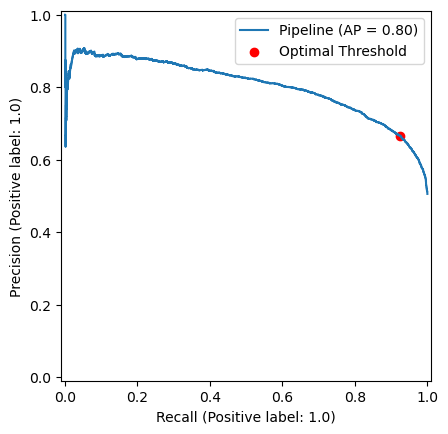

In [930]:
y_scores = lr_1.predict_proba(X_test)[:, 1]  

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

C_FN = 2  # Стоимость пропуска диабета
C_FP = 1  # Стоимость ложного диагноза
weighted_cost = C_FN * (1 - recall) + C_FP * ((1 - precision) / precision)

optimal_idx = np.argmin(weighted_cost)
optimal_threshold = thresholds[optimal_idx]

print(f"Оптимальный порог: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]}, Recall: {recall[optimal_idx]}")

display = PrecisionRecallDisplay.from_estimator(lr_1, X_test, y_test)
plt.scatter(recall[optimal_idx], precision[optimal_idx], color='red', label='Optimal Threshold')
plt.legend()
plt.show()

In [932]:
ftc_lr = FixedThresholdClassifier(lr_1, threshold= 0.3048026866398376, response_method="predict_proba")
ftc_lr.fit(X_train, y_train)

y_pred = ftc_lr.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.818885254151988


### Метод опорных векторов

In [26]:
svm_1 = Pipeline([
    ('preprocessing', RobustScaler()),
    ('clf', svm.SVC(probability=True, kernel = 'poly', degree = 3))
])
beta = sqrt(2)
svm_1.fit(X_train, y_train)
y_pred = svm_1.predict(X_test)
print(fbeta_score(y_test, y_pred, beta=beta))

0.8021020251217637


## Voiting

In [766]:
clf_v1 = LogisticRegression(max_iter=7000, penalty='l2', solver='lbfgs')
clf_v2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1)
clf_v3 = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, n_estimators=200,random_state=42)

e_v_clf = VotingClassifier(
    estimators=[('lr', clf_v1), ('rf', clf_v2), ('gb', clf_v3)],
    voting='soft')

beta = sqrt(2)

for clf, label in zip([clf_v1, clf_v2, clf_v3, e_v_clf], ['Logistic Regression', 'Random Forest', 
                                                 'GradientBoosting', 'Voiting']):
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test) 
    fbeta = fbeta_score(y_test, y_pred, beta=beta)  
    print(f"F-beta score: {fbeta:.2f} [{label}]")

F-beta score: 0.76 [Logistic Regression]
F-beta score: 0.77 [Random Forest]
F-beta score: 0.78 [GradientBoosting]
F-beta score: 0.77 [Voiting]


In [698]:
clf_v1 = svm.SVC(probability=True, kernel = 'poly', degree = 3)
clf_v2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1)
clf_v3 = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, n_estimators=200,random_state=42)

e_v_clf = VotingClassifier(
    estimators=[('svm', clf_v1), ('rf', clf_v2), ('gb', clf_v3)],
    voting='hard')

beta = sqrt(2)

for clf, label in zip([clf_v1, clf_v2, clf_v3, e_v_clf], ['SVM', 'Random Forest', 
                                                 'GradientBoosting', 'Voiting']):
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    fbeta = fbeta_score(y_test, y_pred, beta=beta)  
    print(f"F-beta score: {fbeta:.2f} [{label}]")

F-beta score: 0.77 [SVM]
F-beta score: 0.77 [Random Forest]
F-beta score: 0.78 [GradientBoosting]
F-beta score: 0.78 [Voiting]


In [934]:
clf_v1 = LogisticRegression(max_iter=7000, penalty='l2', solver='lbfgs')
clf_v2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1)
clf_v3 = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, n_estimators=200,random_state=42)

ftc_v1 = FixedThresholdClassifier(clf_v1, threshold=0.3048026866398376, response_method="predict_proba")
ftc_v2 = FixedThresholdClassifier(clf_v2, threshold=0.32030701410104256, response_method="predict_proba")
ftc_v3 = FixedThresholdClassifier(clf_v3, threshold=0.31556538937073886, response_method="predict_proba")

e_v_clf = VotingClassifier(
    estimators=[('lr', ftc_v1), ('rf', ftc_v2), ('gb', ftc_v3)],
    voting='hard')

beta = sqrt(2)

for clf, label in zip([ftc_v1, ftc_v2, ftc_v3, e_v_clf], ['Logistic Regression', 'Random Forest', 
                                                 'Gradient Boosting', 'Voiting']):
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    fbeta = fbeta_score(y_test, y_pred, beta=beta)  
    print(f"F-beta score: {fbeta:.4f} [{label}]")

F-beta score: 0.8188 [Logistic Regression]
F-beta score: 0.8152 [Random Forest]
F-beta score: 0.8187 [Gradient Boosting]
F-beta score: 0.8186 [Voiting]


### Stacking

In [746]:
clf_v1 = LogisticRegression(max_iter=7000, penalty='l2', solver='lbfgs')
clf_v2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1)
clf_v3 = GradientBoostingClassifier(learning_rate=0.1, subsample=0.75, n_estimators=200,random_state=42)

e_s_clf = StackingClassifier(
        estimators = [
            ('lr', clf_v1), 
            ('rf', clf_v2), 
            ('gb', clf_v3)],
        final_estimator = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split = 10, min_samples_leaf = 10, max_features=None, random_state=42, n_jobs=-1),
        stack_method = 'predict_proba'
)

e_s_clf.fit(X_train, y_train)

beta = sqrt(2)

for clf, label in zip([clf_v1, clf_v2, clf_v3], ['Logistic Regression', 'Random Forest', 
                                                 'Gradient Boosting']):
    clf.fit(X_train, y_train)  
    y_pred = clf.predict(X_test)  
    fbeta = fbeta_score(y_test, y_pred, beta=beta)  
    print(f"F-beta score: {fbeta:.2f} [{label}]")

y_pred_stack = e_s_clf.predict(X_test)
fbeta_stack = fbeta_score(y_test, y_pred_stack, beta=beta)
print(f"F-beta score: {fbeta_stack:.2f} [Stacking]")

F-beta score: 0.76 [Logistic Regression]
F-beta score: 0.77 [Random Forest]
F-beta score: 0.78 [Gradient Boosting]
F-beta score: 0.79 [Stacking]
